## Observations and Insights 

# Successful drug trials can be determined as either the drug with the least time intervals or the drug with the lowest tumor volume at the last time interval
# All drugs reduced Tumor Volume
# There is no notable difference between how the drugs work on males vs. females

In [265]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Optional: Get all the data for the duplicate mouse ID.
pcom = pd.merge(mouse_metadata, study_results, on="Mouse ID")
pcom.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [266]:
# Checking the number of mice in the DataFrame.
#249 mice
count = pcom["Mouse ID"].value_counts()
count

g989    13
r811    10
l661    10
l509    10
e476    10
        ..
b447     1
t573     1
h428     1
n482     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

In [267]:
# # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe = pcom.groupby(["Mouse ID"])
dupe["Mouse ID", "Timepoint"].head()

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1883,z969,0
1884,z969,5
1885,z969,10
1886,z969,15


In [268]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique = pcom.drop_duplicates("Mouse ID")
unique.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [269]:
# Checking the number of mice in the clean DataFrame.
len(unique)

249

## Summary Statistics

In [281]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
# study_results
stat_df = study_results.groupby("Mouse ID")
# stat_df["Mouse ID", "Tumor Volume (mm3)"].head()

# Mean
mean = stat_df["Mouse ID", "Tumor Volume (mm3)"].mean()
# mean.head()

# Median
median = stat_df["Mouse ID", "Tumor Volume (mm3)"].median()
# median.head()

# Variance
variance = stat_df["Mouse ID", "Tumor Volume (mm3)"].var()
# variance.head()

# Standard Deviation
stdev = stat_df["Mouse ID", "Tumor Volume (mm3)"].std()
# stdev.head()

# SEM
sem  = stat_df["Tumor Volume (mm3)"].sem()
# sem.head()

sumstat1 = pd.merge(mean, median, on = "Mouse ID")
rename1 = sumstat1.rename(columns = {"Tumor Volume (mm3)_x":"Mean Tumor Vol",
                                    "Tumor Volume (mm3)_y":"Median Tumor Vol"})

sumstat2 = pd.merge(rename1, variance, on = "Mouse ID")
rename2 = sumstat2.rename(columns = {"Tumor Volume (mm3)":"Variance Tumor Vol"})

sumstat3 = pd.merge(rename2, stdev, on = "Mouse ID")
rename3 = sumstat3.rename(columns = {"Tumor Volume (mm3)":"Standard Deviation Tumor Vol"})

sumstat4 = pd.merge(rename3, sem, on = "Mouse ID")
sumstat = sumstat4.rename(columns = {"Tumor Volume (mm3)":"SEM Tumor Vol"})

sumstat.head()

,Mean Tumor Vol,Median Tumor Vol,Variance Tumor Vol,Standard Deviation Tumor Vol,SEM Tumor Vol
Mouse ID,,,,,
a203,56.312708,55.983272,50.407041,7.099792,2.245151
a251,55.237095,55.938620,51.740730,7.193103,2.274659
a262,58.611631,58.572588,84.759928,9.206515,2.911356
a275,52.770965,52.044750,36.322924,6.026850,1.905857
a366,54.639906,55.265582,38.415384,6.198015,2.342629


In [271]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Same as above

## Bar Plots

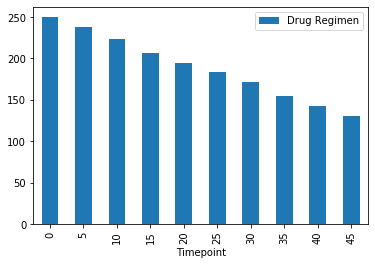

In [272]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

# pcom.head()
#pcom.tail()
# use this to get a list of time intervals
timepoints = [0,5,10,15,20,25,30,35,40,45]

# micepertime = pcom.groupby("Timepoint").count()
# micepertime["Drug Regimen"]
#use this to get a count of treatments for each time interval
treatmentcount = [250,238,223,207,195,183,171,154,142,130]

# x = np.arange(len(timepoints))
# plt.xticks(tick,timepoints)
# plt.bar(x,treatmentcount,color='chartreuse',align="center")

pdplotdata = pcom.groupby("Timepoint").count()
del pdplotdata["Sex"]
del pdplotdata["Age_months"]
del pdplotdata["Weight (g)"]
del pdplotdata["Tumor Volume (mm3)"]
del pdplotdata["Metastatic Sites"]
del pdplotdata["Mouse ID"]
pdplotdata.plot(kind="bar")


<BarContainer object of 10 artists>

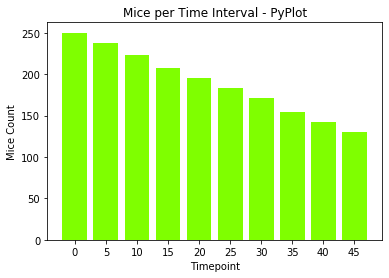

In [273]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

# pcom.head()
#pcom.tail()
# use this to get a list of time intervals
timepoints = [0,5,10,15,20,25,30,35,40,45]

# micepertime = pcom.groupby("Timepoint").count()
# micepertime["Drug Regimen"]
#use this to get a count of treatments for each time interval
treatmentcount = [250,238,223,207,195,183,171,154,142,130]

x = np.arange(len(timepoints))
tick = [value for value in x]
plt.xticks(tick,timepoints)
plt.title("Mice per Time Interval - PyPlot")
plt.xlabel("Timepoint")
plt.ylabel("Mice Count")
plt.bar(x,treatmentcount,color='chartreuse',align="center")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B1DE2FB748>],
      dtype=object)

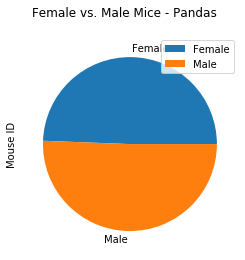

In [274]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# pcom

micesex = pcom.groupby("Sex").count()
# micesex.head()


del micesex["Drug Regimen"]
del micesex["Age_months"]
del micesex["Weight (g)"]
del micesex["Timepoint"]
del micesex["Tumor Volume (mm3)"]
del micesex["Metastatic Sites"]

# micesex

micesex.plot(kind="pie", subplots="True", title="Female vs. Male Mice - Pandas")


([<matplotlib.patches.Wedge at 0x1b1de3c1e48>,
 [Text(-0.4457697555597279, 1.0056288207028579, 'Female'),
  Text(0.445769755559728, -1.0056288207028579, 'Male')],
 [Text(-0.2431471393962152, 0.5485248112924678, '49.4%'),
  Text(0.24314713939621524, -0.5485248112924678, '50.6%')])

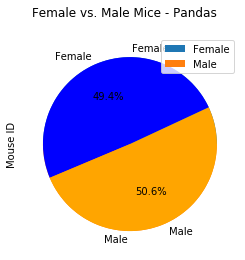

In [275]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# pcom

micesex = pcom.groupby("Sex").count()
# micesex.head()


del micesex["Drug Regimen"]
del micesex["Age_months"]
del micesex["Weight (g)"]
del micesex["Timepoint"]
del micesex["Tumor Volume (mm3)"]
del micesex["Metastatic Sites"]

# micesex
sizes = [935,958]
labels=["Female","Male"]
colors = ["Blue", "Orange"]
micesex.plot(kind="pie", subplots="True", title="Female vs. Male Mice - Pandas")
plt.pie(sizes, explode=None, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=25)


## Quartiles, Outliers and Boxplots

In [276]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#ASSUMPTION:
    #Based on endunique.groupby("Drug Regimen").sum(), the 4 most promising treatment
#         regimens are Ramicane, Capomulin, Propriva and Ceftamin because they have the lowest tumor volumes at final timepoint
# pcom.head()
endunique = pcom.drop_duplicates("Mouse ID",keep='last')
del endunique["Sex"]
del endunique["Age_months"]
del endunique["Weight (g)"]
del endunique["Metastatic Sites"]

dreg = endunique.groupby(["Drug Regimen","Mouse ID"]).sum()
promising_treatments = endunique.groupby("Drug Regimen").sum()
# promising_treatments

p = promising_treatments["Tumor Volume (mm3)"]
q = p.quantile([.25,.5,.75])
lowq = q[.25]
upq = q[.75]
iqr = upq - lowq
# iqr

outlier = lowq-(1.5*iqr)
outlier2 = upq+(1.5*iqr)
# outlier
# outlier2

Final_Tumor_Volume = promising_treatments
iqr
outlier
outlier2

1623.8684407512496

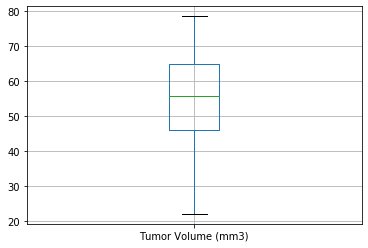

In [277]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
endunique = pcom.drop_duplicates("Mouse ID",keep='last')
del endunique["Sex"]
del endunique["Age_months"]
del endunique["Weight (g)"]
del endunique["Metastatic Sites"]
# endunique

#Since unigrp includes only the final timepoint for each Mouse ID, we no longer need timepoint column
unigrp = endunique.groupby(["Drug Regimen","Mouse ID"]).sum()
del unigrp["Timepoint"]
# unigrp
unigrp.boxplot()

## Line and Scatter Plots

Drug Regimen
Capomulin    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

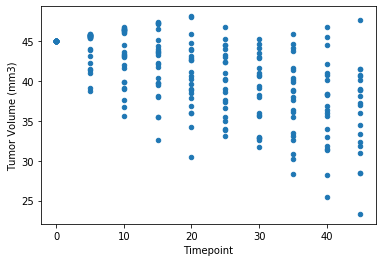

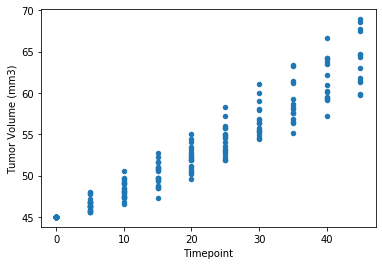

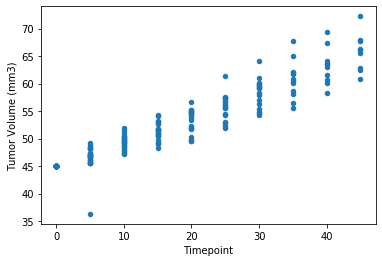

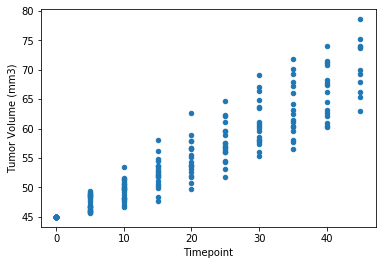

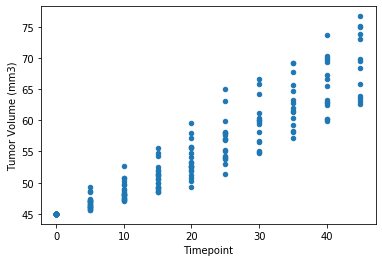

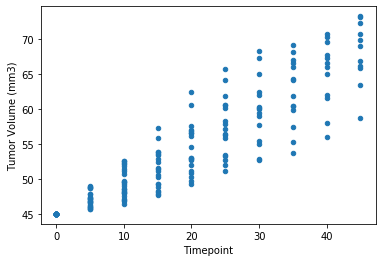

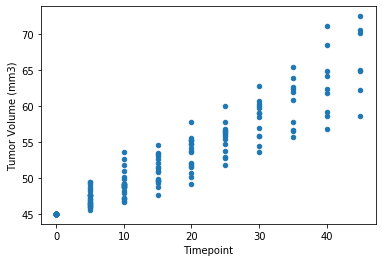

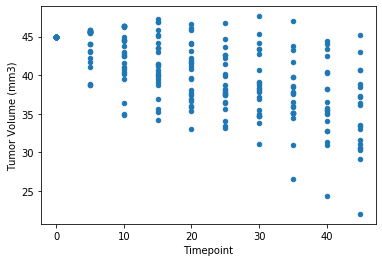

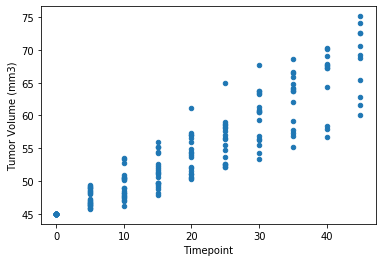

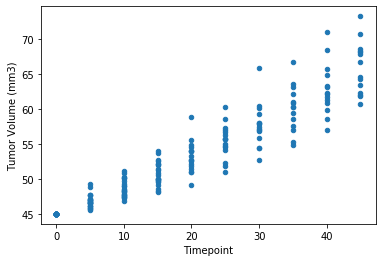

In [278]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# pcom
scatter_data = pcom.copy()
del scatter_data["Sex"]
del scatter_data["Age_months"]
del scatter_data["Weight (g)"]
del scatter_data["Metastatic Sites"]
scatter_data.groupby("Drug Regimen").plot(x="Timepoint",y="Tumor Volume (mm3)",kind="scatter").head(1)

Drug Regimen
Capomulin    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

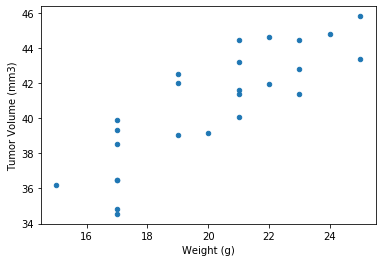

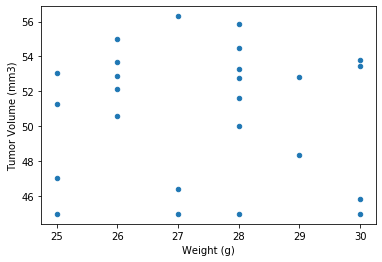

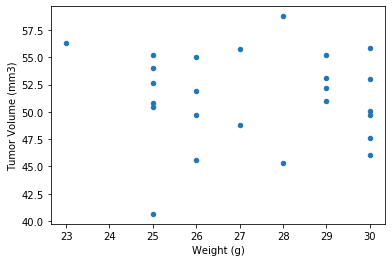

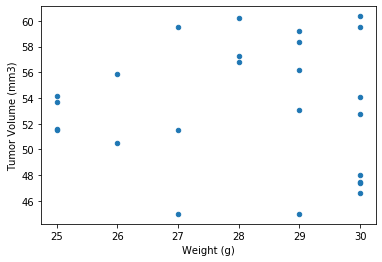

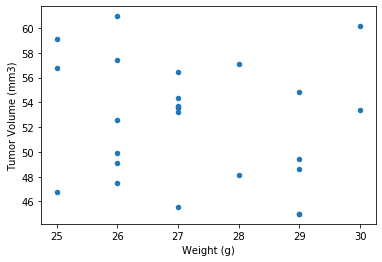

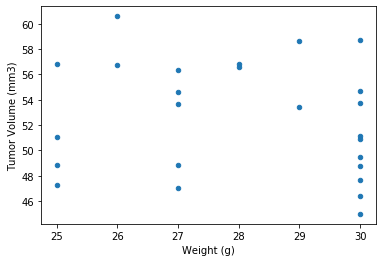

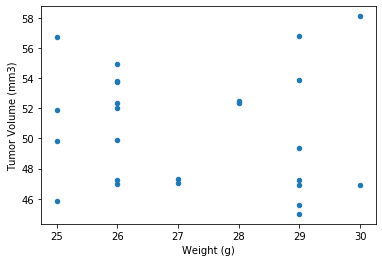

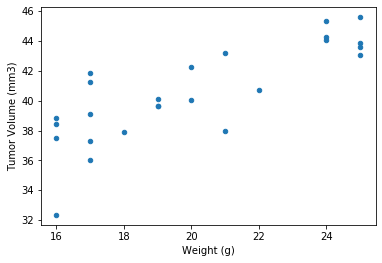

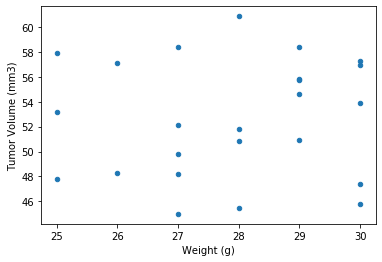

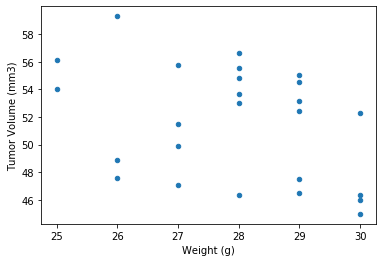

In [279]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# pcom
scatter_data2 = pcom.copy()
del scatter_data2["Sex"]
del scatter_data2["Age_months"]
del scatter_data2["Metastatic Sites"]
# scatter_data2
atv = scatter_data2.groupby(["Drug Regimen","Mouse ID"]).mean()
atv.groupby("Drug Regimen").plot(x="Weight (g)",y="Tumor Volume (mm3)",kind="scatter").head(1)


## Correlation and Regression

In [280]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# pcom
scatter_data2 = pcom.copy()
del scatter_data2["Sex"]
del scatter_data2["Age_months"]
del scatter_data2["Metastatic Sites"]
# scatter_data2
atv = scatter_data2.groupby(["Drug Regimen","Mouse ID"]).mean()

x = atv["Weight (g)"]
y= atv["Tumor Volume (mm3)"]
corr_co = st.pearsonr(x,y)
corr_co


#Regression
#I couldn't get the regression formula to work. I tried entering it as each of the formulas below with no luck.
#I thought that it should be "st" instead of "linregress" because the dependency imports scipy.stats as st
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
# (slope, intercept, rvalue, pvalue, stderr) = st(x, y)
# reg = st(x, y)
# reg
# regression_line = x * slope + intercept

TypeError: 'module' object is not callable